### This notebook shows our PCA analysis of blog posts

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [47]:
db = pd.read_csv('sample3.csv')

### PCA plot keeping blogposts by same author separate

In [122]:
#create dfidf for feature representation

#retaining labels
db_mapping = db[['chap_num','gender','id']].copy()
db_mapping.drop_duplicates(inplace=True)
print(len(db_mapping))
db_mapping.head()

#Aggregating corpus
db.token_str = db.token_str.astype('str')
cdb = db.groupby('chap_num')\
    .apply(lambda x: ' '.join(x.token_str))\
    .to_frame()\
    .rename(columns={0:'text'})
cdb.head()

#Merginig db
dbm = pd.merge(cdb,db_mapping,left_index=True,right_on='chap_num')

#TFIDF
vect = TfidfVectorizer(min_df = .005,max_df = 0.1,lowercase=True,stop_words='english',norm='l1',ngram_range=(1,2),max_features=1500).fit(dbm['text'])
X_train_word = vect.transform(dbm['text'])

10000


In [123]:
tfidf = X_train_word.toarray()

In [124]:
tfidf.shape

(10000, 1500)

In [125]:
x = StandardScaler().fit_transform(tfidf)

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [127]:
dbm2 = dbm.reset_index()

In [128]:
finalDf = pd.concat([principalDf, dbm2[['gender']]], axis = 1)

male
female


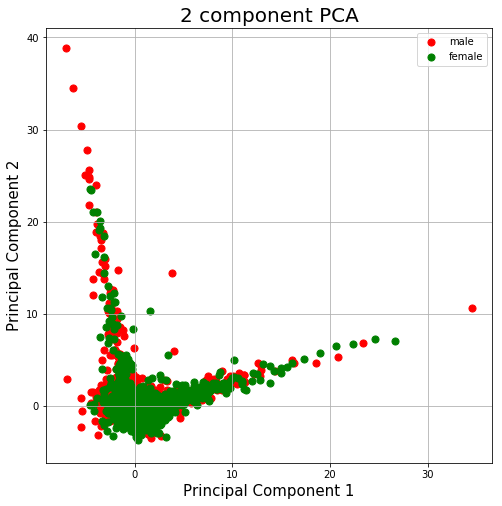

In [130]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### PCA plot same as above with tfidf of 50k features instead of 1,500

In [111]:
vect = TfidfVectorizer(min_df=0.005,lowercase=True,stop_words='english',norm='l1',ngram_range=(1,2),max_features=50000).fit(dbm['text'])
X_train_word = vect.transform(dbm['text'])

In [28]:
tfidf = X_train_word.toarray()
x = StandardScaler().fit_transform(tfidf)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dbm2 = dbm.reset_index()
finalDf = pd.concat([principalDf, dbm2[['gender']]], axis = 1)

male
female


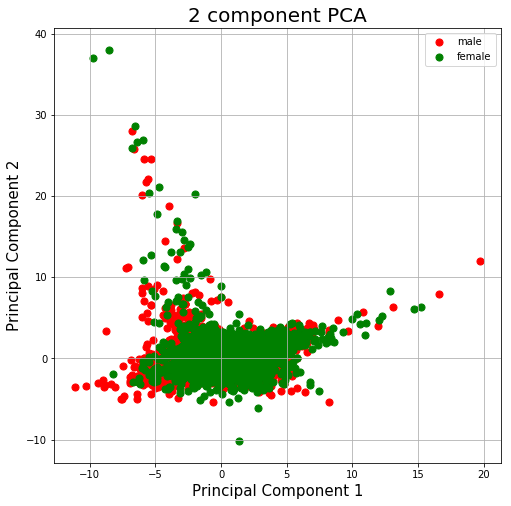

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Conclusion: Not much difference in first two components based on gender

### Character based tfidf instead of word based tfidf

In [30]:
vect_c = TfidfVectorizer(min_df=0.005,lowercase=True,stop_words='english',norm='l1',ngram_range=(2,6),analyzer='char',max_features=5000).fit(dbm['text'])

In [31]:
X_train_word = vect_c.transform(dbm['text'])

In [32]:
tfidf = X_train_word.toarray()
print(tfidf.shape)
x = StandardScaler().fit_transform(tfidf)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dbm2 = dbm.reset_index()
finalDf = pd.concat([principalDf, dbm2[['gender']]], axis = 1)

(10000, 5000)


male
female


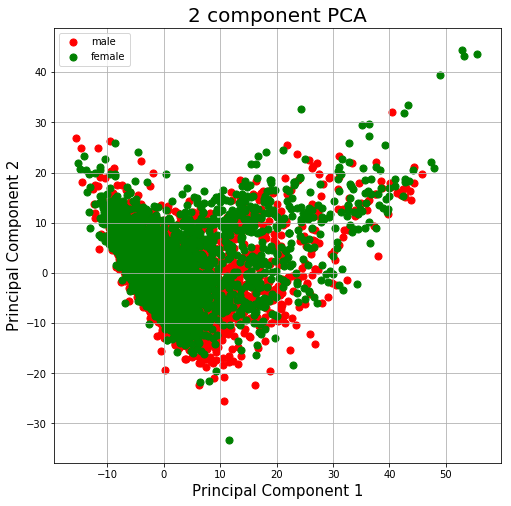

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Conclusion: still not much different between genders

### Here we filtered the topic to be only blogs by students to see if that would allow for better separation

In [43]:
newdb = db[db['topic'] == 'Student']


#create dfidf for feature representation

#retaining labels
db_mapping = newdb[['chap_num','gender','id']].copy()
db_mapping.drop_duplicates(inplace=True)
print(len(db_mapping))
db_mapping.head()

#Aggregating corpus
newdb.token_str = newdb.token_str.astype('str')
cdb = newdb.groupby('chap_num')\
    .apply(lambda x: ' '.join(x.token_str))\
    .to_frame()\
    .rename(columns={0:'text'})
cdb.head()

#Merginig db
dbm = pd.merge(cdb,db_mapping,left_index=True,right_on='chap_num')

#TFIDF
vect = TfidfVectorizer(min_df=0.005,lowercase=True,stop_words='english',norm='l1',ngram_range=(1,2),max_features=10000).fit(dbm['text'])
X_train_word = vect.transform(dbm['text'])

2110


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [44]:
dbm['gender'].value_counts()

male      1064
female    1046
Name: gender, dtype: int64

In [45]:
tfidf = X_train_word.toarray()
x = StandardScaler().fit_transform(tfidf)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dbm2 = dbm.reset_index()
finalDf = pd.concat([principalDf, dbm2[['gender']]], axis = 1)

male
female


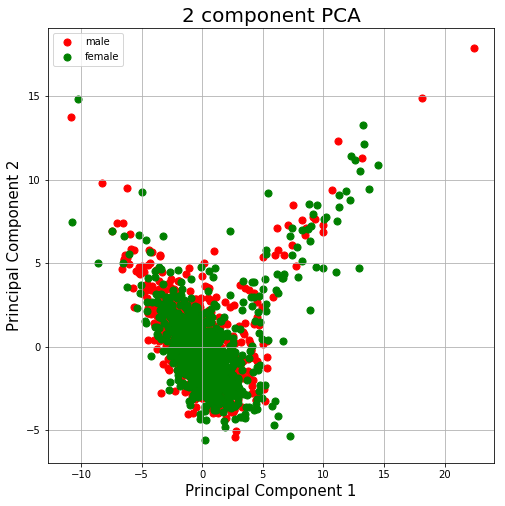

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Conclusion: Including only one topic does not help PCA differentiate by gender

### Here we tried taking out some additional stop words before creating the tfidf, to see if that was affecting the PCA

In [60]:
mean = pd.read_csv('mean.csv', header = None)
mean.head()
meanlist = mean[0].tolist()

In [74]:
meanlist.append('urlLink')
meanlist

['urllink',
 'nbsp',
 "'s",
 "n't",
 "'m",
 'like',
 'one',
 'think',
 'get',
 'blog',
 'urlLink']

In [75]:
dbless = db[~db['token_str'].isin(meanlist)]

In [80]:
#create dfidf for feature representation

#retaining labels
db_mapping = dbless[['chap_num','gender','id']].copy()
db_mapping.drop_duplicates(inplace=True)
print(len(db_mapping))
db_mapping.head()

#Aggregating corpus
dbless.token_str = dbless.token_str.astype('str')
cdb = dbless.groupby('chap_num')\
    .apply(lambda x: ' '.join(x.token_str))\
    .to_frame()\
    .rename(columns={0:'text'})
cdb.head()

#Merginig db
dbm = pd.merge(cdb,db_mapping,left_index=True,right_on='chap_num')

#TFIDF
vect = TfidfVectorizer(min_df=0.005,lowercase=True,stop_words='english',norm='l1',ngram_range=(1,2),max_features=1500).fit(dbm['text'])
X_train_word = vect.transform(dbm['text'])

10000


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [81]:
tfidf = X_train_word.toarray()
x = StandardScaler().fit_transform(tfidf)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dbm2 = dbm.reset_index()
finalDf = pd.concat([principalDf, dbm2[['gender']]], axis = 1)

male
female


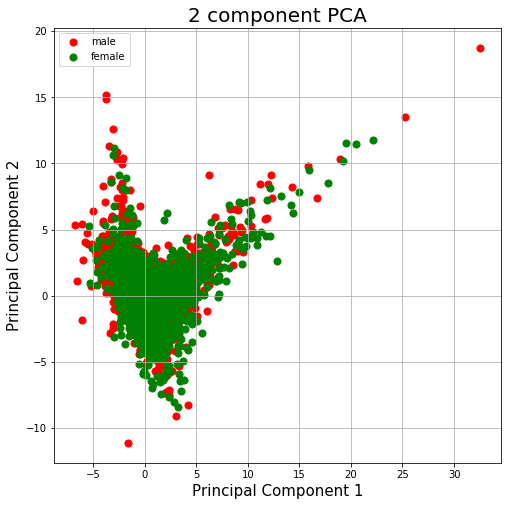

In [82]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Conclusion:  Removing these additional common words did not help PCA differentiate by gender

### Finally, we attempted to concat the posts by the same author before creating tfidf

In [179]:
db = pd.read_csv('sampleorig.csv')

db = db[['gender','text','id']]

dbm = db.groupby(['gender','id'])\
    .apply(lambda x: ' '.join(x.text))\
    .to_frame()\
    .rename(columns={0:'text'})
dbm.reset_index(inplace=True)
dbm.head()

dbm.text = dbm.text.str.replace('urllink'," ")
dbm.text = dbm.text.str.replace('nbsp'," ")

In [180]:
#TFIDF
vect = TfidfVectorizer(min_df=0.005,lowercase=True,stop_words='english',norm='l1',ngram_range=(1,2),max_features=1500).fit(dbm['text'])
X_train_word = vect.transform(dbm['text'])

In [181]:
tfidf = X_train_word.toarray()
x = StandardScaler().fit_transform(tfidf)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
dbm2 = dbm.reset_index()
finalDf = pd.concat([principalDf, dbm2[['gender']]], axis = 1)

male
female


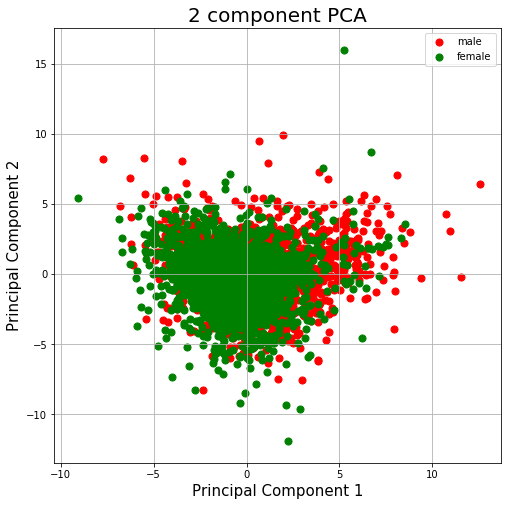

In [182]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['male', 'female']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    print(target)
    indicesToKeep = finalDf['gender'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Conclusion: Here we see some results, although they are subtle.  Male varies more along component 1 while female varies more along component 2.